In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt


time: 1.93 s (started: 2021-05-26 10:50:11 +00:00)


In [ ]:
# from tensorflow.keras import mixed_precision

# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)

time: 1.29 ms (started: 2021-05-26 10:50:13 +00:00)


In [ ]:
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'food101',
    data_dir = "/content/drive/MyDrive/Colab Notebooks/Datasets/TensorflowDatasets",
    split=['train[:70%]', 'train[70%:]', 'validation'],
    
    with_info=True,
    as_supervised=True
)


time: 635 ms (started: 2021-05-26 10:50:13 +00:00)


In [ ]:
print(ds_info)

tfds.core.DatasetInfo(
    name='food101',
    version=2.0.0,
    description='This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.',
    homepage='https://www.vision.ee.ethz.ch/datasets_extra/food-101/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
    }),
    total_num_examples=101000,
    splits={
        'train': 75750,
        'validation': 25250,
    },
    supervised_keys=('image', 'label'),
    citation="""@inproceedings{bossard14,
      title = {Food-101 -- Mining Discriminative Components with Random Forests},
      

In [ ]:
print(type(ds_train))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
time: 1.73 ms (started: 2021-05-26 10:50:14 +00:00)


In [ ]:
# get_label_name = ds_info.features['label'].int2str

# image, label = next(iter(ds_train))
# _ = plt.imshow(image)
# _ = plt.title(get_label_name(label))

time: 1.37 ms (started: 2021-05-26 10:50:14 +00:00)


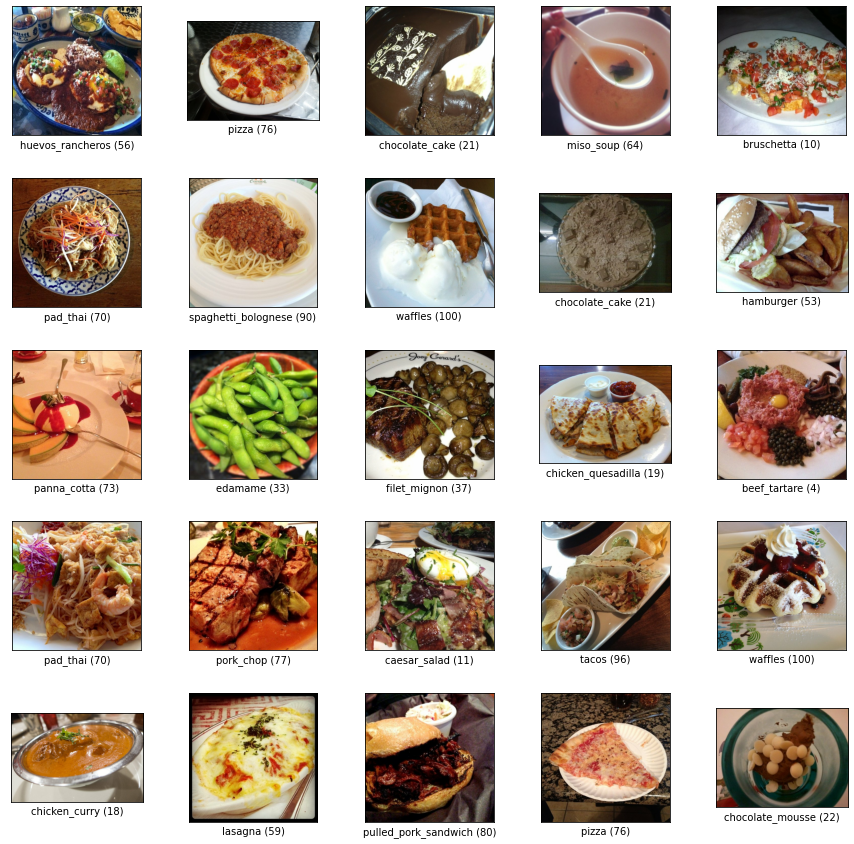

time: 1.99 s (started: 2021-05-26 10:50:14 +00:00)


In [ ]:
fig = tfds.show_examples(ds_train, ds_info, rows = 5, cols = 5)

In [ ]:
img_height = img_width = 224

print(img_height)
print(img_width)


AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 64







224
224
time: 4.67 ms (started: 2021-05-26 10:50:16 +00:00)


In [ ]:
def downscale_img(image, label):
  image = tf.image.resize(image, [img_height, img_width])
  # image = tf.reshape(-1,img_height*img_width)
  return image, label



ds_train = ds_train.map(downscale_img, num_parallel_calls=AUTOTUNE)
ds_val = ds_val.map(downscale_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.map(downscale_img, num_parallel_calls=AUTOTUNE)


time: 104 ms (started: 2021-05-26 10:50:16 +00:00)


In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

def configure_for_performance(ds):
    ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
    # ds = ds.cache("Cache")
    ds = ds.shuffle(buffer_size=256)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

# def configure_for_performance_2(ds):
#     ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
#     ds = ds.cache("Cache")
#     ds = ds.shuffle(buffer_size=256)
#     ds = ds.batch(BATCH_SIZE)
#     ds = ds.prefetch(buffer_size=AUTOTUNE)
#     return ds

def configure_for_performance_3(ds):
    ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

time: 14.1 ms (started: 2021-05-26 10:50:16 +00:00)


In [ ]:
ds_train = configure_for_performance(ds_train)
ds_val = configure_for_performance_3(ds_val)
ds_test = configure_for_performance_3(ds_test)


time: 88.7 ms (started: 2021-05-26 10:50:16 +00:00)


In [ ]:
for image, label in ds_train.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

for image, label in ds_val.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())
    
for image, label in ds_test.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())


Image shape:  (64, 224, 224, 3)
Label:  [82 61 72 30 21  4 30 47 19  0 14 36  8 47 18 79 79 64 41 67 30 88 25 39
  1  8 64 17 21 40 23 37 51 84 88 21 27 67 63 74 37 28 46 84  9 84 23 17
 36  3 73 43 53  9 46  9  7 56 33 33 97 22 67  6]
Image shape:  (64, 224, 224, 3)
Label:  [66 37 13 66 66 89 37  3 76 88 11 63 46 62 60 83 90  3 93 79 79 48 34 10
 66 93  2 46 89 52 88 66 90 93 37 66 72 73  3 89  5 30  8  2 26 76  3 80
 70  3 37 85 56 60 18 65 67 55 39 11 37 97 72  5]
Image shape:  (64, 224, 224, 3)
Label:  [ 29  81  91  53  97  97  10  31   3 100   4  32  32   3   8  85  84  60
  29  80  32  78  17   1  40  40  99   1  71  42   6  44  15  49  12   7
  33  52  69  54  88  50  53   3  38   6  84  70  93  83  98  40  60  13
  36  92  21  25  29  81  66  81   1  92]
time: 1.77 s (started: 2021-05-26 10:50:16 +00:00)


In [ ]:
num_classes = ds_info.features["label"].num_classes


# Creating model
model = tf.keras.applications.MobileNet(
    include_top=False, input_shape=(img_height, img_width, 3),
    classes=num_classes, weights='imagenet') #, pooling='avg')


x = model.output

x = layers.GlobalAveragePooling2D()(x)

# output layer
predictions = layers.Dense(num_classes, activation="softmax")(x)

model = Model(inputs = model.input, outputs = predictions)
  
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
from tensorflow.keras.optimizers import Adamax

# Model compilation
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adamax(0.0001),
              metrics=['accuracy'])


# Training model
model_history = model.fit(ds_train,
                          epochs=20,
                          validation_data=ds_val,
                          verbose=1)


path = '/content/drive/MyDrive/Colab Notebooks/Notebooks/Models/MobileNet_Food101_Base/'
model.save(path)

Epoch 1/20
829/829 [==============================] - 277s 329ms/step - loss: 3.1422 - accuracy: 0.2961 - val_loss: 2.2328 - val_accuracy: 0.4777
Epoch 2/20
829/829 [==============================] - 272s 327ms/step - loss: 1.8224 - accuracy: 0.5668 - val_loss: 1.7175 - val_accuracy: 0.5802
Epoch 3/20
829/829 [==============================] - 274s 327ms/step - loss: 1.3902 - accuracy: 0.6642 - val_loss: 1.5159 - val_accuracy: 0.6219
Epoch 4/20
829/829 [==============================] - 273s 328ms/step - loss: 1.1320 - accuracy: 0.7288 - val_loss: 1.4062 - val_accuracy: 0.6445
Epoch 5/20
829/829 [==============================] - 272s 328ms/step - loss: 0.9379 - accuracy: 0.7794 - val_loss: 1.3389 - val_accuracy: 0.6623
Epoch 6/20
829/829 [==============================] - 274s 327ms/step - loss: 0.7853 - accuracy: 0.8224 - val_loss: 1.2947 - val_accuracy: 0.6694
Epoch 7/20
829/829 [==============================] - 271s 326ms/step - loss: 0.6573 - accuracy: 0.8596 - val_loss: 1.2592 -

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Notebooks/Models/MobileNet_Food101_Base/assets


time: 1h 37min 35s (started: 2021-05-26 10:50:19 +00:00)


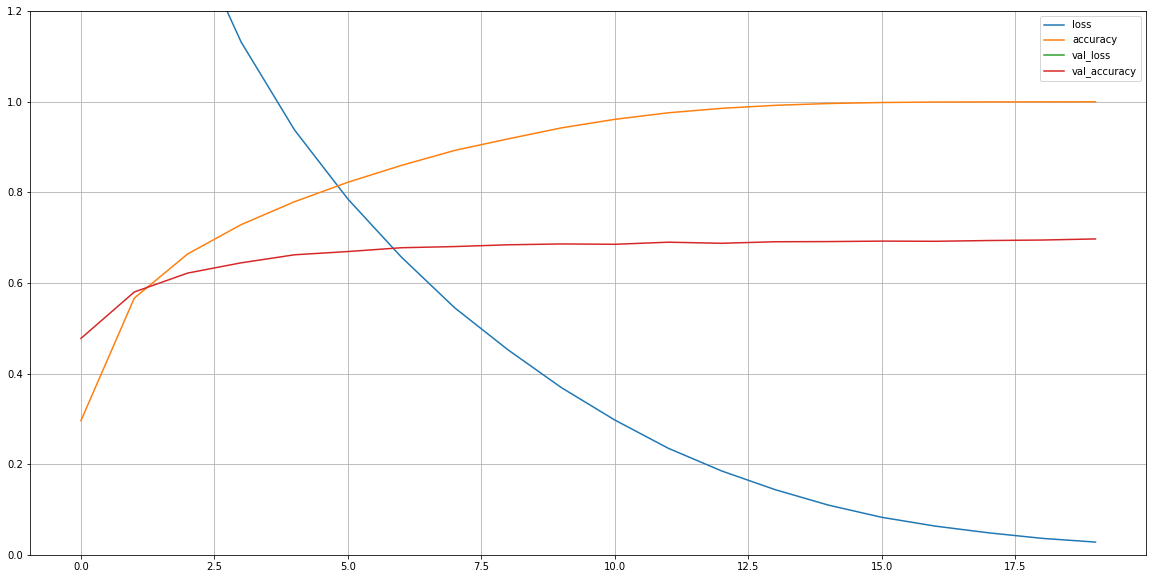

time: 495 ms (started: 2021-05-26 12:27:54 +00:00)


In [ ]:
img_path = path + 'Graph'

pd.DataFrame(model_history.history).plot(figsize=(20, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.savefig(img_path)
plt.show()

In [ ]:
loss_value, acc = model.evaluate(ds_test)

print(f"Test Accuracy: {(acc*100):.3f}%")
print(f"Loss: {loss_value:.3f}%")

395/395 [==============================] - 47s 114ms/step - loss: 0.9995 - accuracy: 0.7396
Test Accuracy: 73.960%
Loss: 0.999%
time: 1min 21s (started: 2021-05-26 12:27:55 +00:00)
